## Texas Employment - ACS 2015
The CSV file contains data from the 2015 American Community Survey. It is limited to Texas, and contains a subset of the total survey variables related to employment. Each row is a person.

In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("Texas.csv")

## 1. Data Cleaning

In [42]:
df.shape

(259224, 21)

In [43]:
df.dtypes

ID           int64
ST           int64
PUMA         int64
JWMNP      float64
SCHL       float64
WAGP       float64
WKHP       float64
WKW        float64
ESR        float64
FOD1P      float64
NAICSP      object
JWAP       float64
JWDP       float64
SOCP        object
POWPUMA    float64
POWSP      float64
NWAB       float64
NWAV       float64
NWLA       float64
NWLK       float64
AGEP         int64
dtype: object

In [44]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,ID,ST,PUMA,JWMNP,SCHL,WAGP,WKHP,WKW,ESR,FOD1P,JWAP,JWDP,POWPUMA,POWSP,NWAB,NWAV,NWLA,NWLK,AGEP
count,259224.000000,259224.0,259224.000000,109500.000000,250232.000000,208917.000000,129932.000000,129932.000000,205266.000000,53917.000000,109500.000000,109500.000000,114898.000000,114898.000000,205266.000000,205266.000000,205266.000000,205266.000000,259224.000000
mean,129612.500000,48.0,3680.988975,26.227854,15.345056,28058.387857,39.670474,1.839023,3.080929,4287.323794,101.523059,53.121233,3659.174120,48.110054,2.594375,4.737083,2.581801,2.568940,38.938578
std,74831.667428,0.0,1781.547603,22.971057,5.933604,52571.880706,13.257255,1.599018,2.413022,1756.026684,40.762345,28.046385,1858.342203,9.955156,0.514133,0.922556,0.508228,0.564185,23.319435
min,1.000000,48.0,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,64806.750000,48.0,2309.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000
50%,129612.500000,48.0,3700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000
75%,194418.250000,48.0,5100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.000000
max,259224.000000,48.0,6900.000000,159.000000,24.000000,451000.000000,99.000000,6.000000,6.000000,6403.000000,285.000000,150.000000,59300.000000,555.000000,3.000000,5.000000,3.000000,3.000000,92.000000


### Missing Value Imputation

In [45]:
df.isnull().sum()

ID              0
ST              0
PUMA            0
JWMNP      149724
SCHL         8992
WAGP        50307
WKHP       129292
WKW        129292
ESR         53958
FOD1P      205307
NAICSP     110875
JWAP       149724
JWDP       149724
SOCP       110875
POWPUMA    144326
POWSP      144326
NWAB        53958
NWAV        53958
NWLA        53958
NWLK        53958
AGEP            0
dtype: int64

In [46]:
#1. ST
df.ST.value_counts()

48    259224
Name: ST, dtype: int64

In [47]:
#2. PUMA - Public use microdata area code (PUMA) based on 2010 Census definition
# No imputation needed

In [48]:
df.PUMA.value_counts()

100     3145
2600    3120
3700    2941
800     2773
600     2494
3400    2258
1000    2257
400     2235
5500    2115
3602    2036
3900    2020
900     1945
502     1822
3601    1765
1800    1762
1906    1749
5000    1742
2003    1733
4701    1716
2101    1695
3802    1692
5100    1662
2102    1659
5400    1628
2800    1626
4000    1616
3502    1605
5306    1595
2006    1592
5700    1590
        ... 
4618     891
4637     889
2304     888
5908     886
4901     884
4623     864
6807     863
2301     852
2506     851
6803     845
4617     844
4903     840
4622     837
4627     830
2511     820
2317     815
4625     800
6806     798
4619     788
4638     775
4503     775
4904     760
6802     758
4611     748
2504     701
6804     672
4504     671
4634     653
4801     602
4633     558
Name: PUMA, dtype: int64

In [49]:
#3. JWMNP - Travel time to work - minutes to get to work

In [50]:
# Imputing JWNMP N/A with 0 as it indicates not a worker or worker who worked at home.
df['JWMNP'].fillna(0,inplace=True)
df.JWMNP.isnull().sum()

0

In [51]:
#4. SCHL - Educational attainment
# N/A (less than 3 years old) - imputing with 0 indicating less than 3 years

In [52]:
df['SCHL'].fillna(0,inplace=True)
df.SCHL.isnull().sum()

0

In [53]:
#5. WAGP - Wages or salary income past 12 months - TARGET
#N/A (less than 15 years old)
#000000 .None
#000001..999999 .$1 to 999999 (Rounded and top-coded)

In [54]:
# removing rows with N/A
df1 = df[~df['WAGP'].isnull()]
df1.WAGP.isnull().sum()

0

In [55]:
df1.shape

(208917, 21)

In [56]:
#6. WKHP - Usual hours worked per week past 12 months
#N/A (less than 16 years old/did not work during the past 12 months)

In [57]:
df1['WKHP'].fillna(0,inplace=True)
df1.WKHP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [58]:
#7. WKW - Weeks worked during past 12 months
#N/A (less than 16 years old/did not work during the past 12 months)

In [59]:
df1['WKW'].fillna(0,inplace=True)
df1.WKW.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [60]:
#8. ESR -Employment status recode
# N/A (less than 16 years old) - imputing with 0 code to indicate the same

In [61]:
df1['ESR'].fillna(0,inplace=True)
df1.ESR.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [62]:
#9. FOD1P - Recoded field of degree - first entry
# N/A (less than bachelor's degree)
df1['FOD1P'].fillna(1000,inplace=True)
df1.FOD1P.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [63]:
#10. NAICSP - Industry recode for 2013 and later based on 2012 NAICS codes  
# N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)

df1['NAICSP'].fillna(100,inplace=True)
df1.NAICSP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [64]:
#11. JWAP - Time of arrival at work - hour and minute
#N/A (not a worker; worker who worked at home)

df1['JWAP'].fillna(0,inplace=True)
df1.JWAP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [65]:
#12. JWDP - Time of departure for work - hour and minute
#N/A (not a worker; worker who worked at home)

df1['JWDP'].fillna(0,inplace=True)
df1.JWDP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [66]:
#13. SOCP - SOC Occupation code for 2012 and later based on 2010 SOC codes 
#N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)

df1['SOCP'].fillna(0,inplace=True)
df1.SOCP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [67]:
#14. POWPUMA - Place of work PUMA based on 2010 Census definition
# N/A (not a worker) - assigning code 0 to indicate the same.

df1['POWPUMA'].fillna(0,inplace=True)
df1.POWPUMA.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [68]:
#15. POWSP - Place of work - State or foreign country recode  
# N/A (not a worker)

df1['POWSP'].fillna(0,inplace=True)
df1.POWSP.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [69]:
#16. NWAB , NWAV, NWLA, NWLK
#N/A (less than 16 years old/at work/on layoff) - imputing with code 0 to indicate the same.

df1.isnull().sum()

ID            0
ST            0
PUMA          0
JWMNP         0
SCHL          0
WAGP          0
WKHP          0
WKW           0
ESR           0
FOD1P         0
NAICSP        0
JWAP          0
JWDP          0
SOCP          0
POWPUMA       0
POWSP         0
NWAB       3651
NWAV       3651
NWLA       3651
NWLK       3651
AGEP          0
dtype: int64

In [70]:
df1.fillna(0,inplace=True)
df1.isnull().sum()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


ID         0
ST         0
PUMA       0
JWMNP      0
SCHL       0
WAGP       0
WKHP       0
WKW        0
ESR        0
FOD1P      0
NAICSP     0
JWAP       0
JWDP       0
SOCP       0
POWPUMA    0
POWSP      0
NWAB       0
NWAV       0
NWLA       0
NWLK       0
AGEP       0
dtype: int64

## 2. Feature Engineering

##### 1. SCHL - Educational attainment

* Reducing the number of levels in this column.
* Creating new column SCHL_Cat

           N/A (less than 3 years old)
           01 .No schooling completed
           02 .Nursery school, preschool   
           03 .Kindergarten
           04 .Grade 1
           05 .Grade 2
           06 .Grade 3                   
           07 .Grade 4
           08 .Grade 5
           09 .Grade 6
           10 .Grade 7                   
           11 .Grade 8  
           12 .Grade 9
           13 .Grade 10
           14 .Grade 11                   
           15 .12th grade - no diploma   
           16 .Regular high school diploma
           17 .GED or alternative credential
           18 .Some college, but less than 1 year
           19 .1 or more years of college credit, no degree
           20 .Associate's degree                           
           21 .Bachelor's degree
           22 .Master's degree
           23 .Professional degree beyond a bachelor's degree
           24 .Doctorate degree

In [71]:
df1.SCHL.value_counts()

16.0    42376
21.0    35376
19.0    32482
18.0    14985
22.0    13435
20.0    13055
17.0     9348
14.0     7741
12.0     7461
13.0     7199
11.0     4078
1.0      3988
15.0     3876
9.0      3757
23.0     3014
24.0     2092
10.0     1438
6.0       942
8.0       931
7.0       609
5.0       455
4.0       190
3.0        55
2.0        34
Name: SCHL, dtype: int64

In [72]:
df1['SCH_Cat'] = ['PreSchool' if x == 2 or x==3 else 'School' if x>3 and x<14  else 'HighSchool' if x>13 and x<18  else 'Graduation' if x == 20 or x==21 else 'College' if x==18 and x==19  else 'PostGraduation' if  x>21  else 'NoSchooling' for x in df1['SCHL']]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [73]:
df1['SCH_Cat'].value_counts()

HighSchool        63341
NoSchooling       51455
Graduation        48431
School            27060
PostGraduation    18541
PreSchool            89
Name: SCH_Cat, dtype: int64

##### 2. FOD1P - Recoded field of degree - first entry

* Reducing the number of levels in this column. This column has huge number of levels. 
* Creating new column FOD1P_Cat

In [74]:
df1.FOD1P.unique()

array([6199., 1000., 3401., 6207., 2406., 6002., 1105., 6203., 6205.,
       5200., 2399., 6200., 2300., 5501., 6107., 2408., 3600., 6106.,
       2312., 6201., 2901., 3700., 4101., 6206., 2304., 5007., 5507.,
       2405., 5301., 2400., 6109., 2102., 1303., 1501., 6004., 2503.,
       6211., 2100., 5506., 3301., 2106., 4001., 2602., 2306., 5403.,
       1401., 2417., 6402., 6000., 4801., 2414., 6209., 2311., 1103.,
       3609., 6212., 6104., 6108., 2313., 2500., 1100., 4002., 3601.,
       1904., 5002., 1902., 5500., 5004., 5003., 2419., 6105., 2301.,
       5203., 5098., 6102., 4000., 2403., 5299., 5901., 1104., 5504.,
       1102., 6299., 6001., 5005., 2601., 1901., 3201., 2502., 6103.,
       2107., 5008., 2412., 2308., 6204., 2309., 2305., 2001., 2599.,
       2401., 3611., 5404., 2504., 2404., 3501., 5601., 3603., 2499.,
       2314., 2310., 2418., 6210., 6110., 3604., 3701., 3608., 2413.,
       5202., 2407., 3606., 5701., 5502., 4901., 1302., 2411., 6007.,
       3702., 3602.,

In [75]:
df1['FOD1P_Cat'] = ['UnderGrad' if x == 1000 else 'Grad_Or_Above' for x in df1['FOD1P']]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
df1['FOD1P_Cat'].value_counts()

UnderGrad        155000
Grad_Or_Above     53917
Name: FOD1P_Cat, dtype: int64

##### 3. NAICSP -NAICS Industry recode for 2013 and later based on 2012 NAICS codes  

* Reducing the number of levels in this column. This column has huge number of levels. 
* Creating new column NAICSP_Cat
* Can be split into industry type ie MFG or AGR or etc. Split based on - 

           111      .AGR-CROP PRODUCTION
           112      .AGR-ANIMAL PRODUCTION AND AQUACULTURE
           1133     .AGR-LOGGING
           113M     .AGR-FORESTRY EXCEPT LOGGING
           114      .AGR-FISHING, HUNTING, AND TRAPPING
           115      .AGR-SUPPORT ACTIVITIES FOR AGRICULTURE AND FORESTRY
           211      .EXT-OIL AND GAS EXTRACTION
           2121     .EXT-COAL MINING
           2122     .EXT-METAL ORE MINING
           2123     .EXT-NONMETALLIC MINERAL MINING AND QUARRYING
           213      .EXT-SUPPORT ACTIVITIES FOR MINING
           2211P    .UTL-ELECTRIC POWER GENERATION, TRANSMISSION AND
                    .DISTRIBUTION
           2212P    .UTL-NATURAL GAS DISTRIBUTION
           22132    .UTL-SEWAGE TREATMENT FACILITIES
           2213M    .UTL-WATER, STEAM, AIR CONDITIONING, AND IRRIGATION
                    .SYSTEMS
           221MP    .UTL-ELECTRIC AND GAS, AND OTHER COMBINATIONS
           22S      .UTL-NOT SPECIFIED UTILITIES
           23       .CON-CONSTRUCTION, INCL CLEANING DURING AND IMM AFTER
           3113     .MFG-SUGAR AND CONFECTIONERY PRODUCTS
           3114     .MFG-FRUIT AND VEGETABLE PRESERVING AND SPECIALTY FOODS
           3115     .MFG-DAIRY PRODUCTS
           3116     .MFG-ANIMAL SLAUGHTERING AND PROCESSING
           311811   .MFG-RETAIL BAKERIES
           3118Z    .MFG-BAKERIES AND TORTILLA, EXCEPT RETAIL BAKERIES
           311M1    .MFG-ANIMAL FOOD, GRAIN AND OILSEED MILLING
           311M2    .MFG-SEAFOOD AND OTHER MISCELLANEOUS FOODS, N.E.C.
           311S     .MFG-NOT SPECIFIED FOOD INDUSTRIES
           3121     .MFG-BEVERAGE
           3122     .MFG-TOBACCO

In [77]:
df1['NAICSP'].value_counts()

100         60568
6111        10782
23          10515
722Z         9093
622          5607
611M1        3472
4451         2837
213          2816
92MP         2750
45211        2662
531          2572
524          2502
5415         2105
484          2027
6216         1982
5413         1756
52M1         1735
5416         1675
6244         1612
6211         1550
8131         1504
5411         1454
713Z         1400
5617Z        1396
6231         1317
4411         1297
8111Z        1293
6214         1280
5613         1275
7211         1204
            ...  
3212           29
81393          29
114            28
5122           27
5191ZM         27
22S            27
33299M         26
3162           26
32621          25
3322           25
113M           22
32711          22
316M           21
3352           20
3253           19
487            17
3369           15
928110P7       15
928110P5       14
454112         13
311S           12
3159            9
53223           7
2122            7
31M       

In [78]:
df1['NAICSP_Cat'] = df1.NAICSP.astype(str).str[:2]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
df1['NAICSP_Cat'].value_counts()

10    60568
62    17384
61    15088
44    10828
72    10698
23    10515
54     9848
81     7576
92     7332
33     7090
56     6620
52     6452
45     5755
48     4890
42     4154
32     3680
21     3658
53     3025
51     2649
71     2483
11     1991
31     1691
49     1636
22     1308
99     1090
4M      416
3M      313
55      179
Name: NAICSP_Cat, dtype: int64

In [80]:
df1['NAICSP_Cat'] = df1['NAICSP_Cat'].astype(str)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
# Combining 31,32,33,3M since all belong to MFG
#  Combining 44,45,4M since all are RET
#  Combining 48,49 since they are all TRN
#  Combining 52,53 since they are all FIN
# Combining 54,55,56 since they are all PRF
# Combining 71,72 since they are all ENT
MFG = ['31','32','33','3M']
RET = ['44','45','4M']
TRN = [48,49]
FIN = [52,53]
PRF = [54,55,56]
ENT = [71,72]

In [82]:
replace_NAISCP_dict = {'32':'31','33':'31','3M':'31','45':'44','4M':'44','49':'48','53':'52','55':'54','56':'54','72':'71'}
df1['NAICSP_Cat'] = df1['NAICSP_Cat'].replace(replace_NAISCP_dict)
df1['NAICSP_Cat'].value_counts()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


10    60568
62    17384
44    16999
54    16647
61    15088
71    13181
31    12774
23    10515
52     9477
81     7576
92     7332
48     6526
42     4154
21     3658
51     2649
11     1991
22     1308
99     1090
Name: NAICSP_Cat, dtype: int64

##### 4. JWAP - Time of arrival at work - hour and minute

* This column has time frame of every 15 mins and hence has a huge number of levels
* We will create a new column of In_time 


##### 5. JWDP - Time of departure for work - hour and minute

* This column has time frame of every 15 mins and hence has a huge number of levels
* We will create a new column of Out_time 

##### 6. SOCP - SOC Occupation code for 2012 and later based on 2010 SOC codes 
* Reducing the number of levels in this column. This column has huge number of levels. 
* Merging similar occupations together.

           1110XX .MGR-CHIEF EXECUTIVES AND LEGISLATORS *
           111021 .MGR-GENERAL AND OPERATIONS MANAGERS
           112011 .MGR-ADVERTISING AND PROMOTIONS MANAGERS
           112020 .MGR-MARKETING AND SALES MANAGERS
           112031 .MGR-PUBLIC RELATIONS AND FUNDRAISING MANAGERS
           113011 .MGR-ADMINISTRATIVE SERVICES MANAGERS
           113021 .MGR-COMPUTER AND INFORMATION SYSTEMS MANAGERS
           113031 .MGR-FINANCIAL MANAGERS
           113111 .MGR-COMPENSATION AND BENEFITS MANAGERS
           113121 .MGR-HUMAN RESOURCES MANAGERS
           113131 .MGR-TRAINING AND DEVELOPMENT MANAGERS
           113051 .MGR-INDUSTRIAL PRODUCTION MANAGERS
           113061 .MGR-PURCHASING MANAGERS
           131041 .BUS-COMPLIANCE OFFICERS
           131051 .BUS-COST ESTIMATORS
           131070 .BUS-HUMAN RESOURCES WORKERS
           131081 .BUS-LOGISTICIANS
           131111 .BUS-MANAGEMENT ANALYSTS
           131121 .BUS-MEETING CONVENTION, AND EVENT PLANNERS
           131131 .BUS-FUNDRAISERS
           131141 .BUS-COMPENSATION, BENEFITS, AND JOB ANALYSIS SPECIALISTS
           131151 .BUS-TRAINING AND DEVELOPMENT SPECIALISTS
           131161 .BUS-MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS
           131199 .BUS-BUSINESS OPERATIONS SPECIALISTS, ALL OTHER
           132011 .FIN-ACCOUNTANTS AND AUDITORS
           132021 .FIN-APPRAISERS AND ASSESSORS OF REAL ESTATE
           132031 .FIN-BUDGET ANALYSTS

In [83]:
df1['SOCP_Cat'] = df1.SOCP.astype(str).str[:2]
df1['SOCP_Cat'].value_counts()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0     60568
43    19837
41    16464
11    15049
25     9806
53     9217
47     8789
35     8132
51     7710
29     7492
13     7170
37     5774
39     5050
49     4889
15     3794
33     3276
31     2977
17     2883
27     2571
21     2189
23     1541
19     1126
99     1090
45      958
55      565
Name: SOCP_Cat, dtype: int64

8. POWPUMA
* Convert into 3 categories - NotWorker_OR_Under16, NonUS_Or_NonPue and Working

In [84]:
df1['POWPUMA_Cat'] = ['NotWorker_OR_Under16' if x == 0 else 'Grad_Or_Above' if x == 1 else 'Assigned_POW' for x in df1['POWPUMA']]
df1['POWPUMA_Cat'].value_counts()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Assigned_POW            114760
NotWorker_OR_Under16     94019
Grad_Or_Above              138
Name: POWPUMA_Cat, dtype: int64

## 3. Exploratory Data Analysis

### 3.1 People based on Education looking for work

* 0. Less than 16 years old/at work/temporarily absent/informed of recall
* 1. Yes
* 2. No
* 3. Did not report

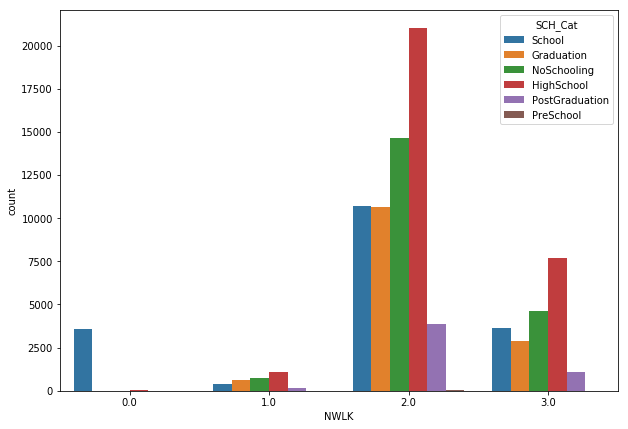

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df11 = df1[df1.WAGP == 0]

plt.figure(figsize=(10,7))
sns.countplot(data = df11, x = 'NWLK',hue="SCH_Cat")

### 3.2 Finding Areas with maximum employees

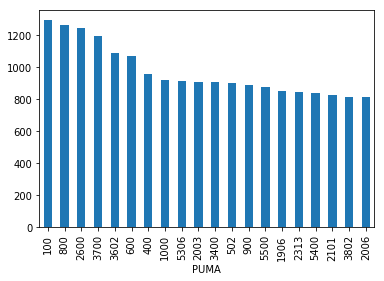

In [106]:
df12 = df1[df1.WAGP != 0]
data=df12.groupby('PUMA')['ID'].count().sort_values(ascending=False).head(20)
data.plot(kind="bar")

### 3.3 Unemployed people with higher education

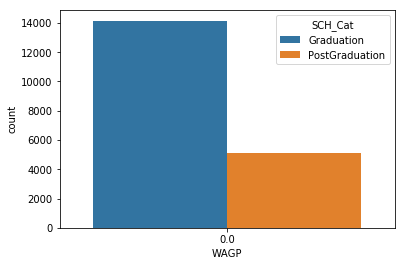

In [92]:
df2=df1[(df1['WAGP'] == 0) & ((df1["SCH_Cat"] == "Graduation") | (df1["SCH_Cat"] =="PostGraduation"))]
sns.countplot(data = df2, x = 'WAGP',hue="SCH_Cat")

### 3.4 Areas of high unemployment

Text(0, 0.5, 'Employee Count')

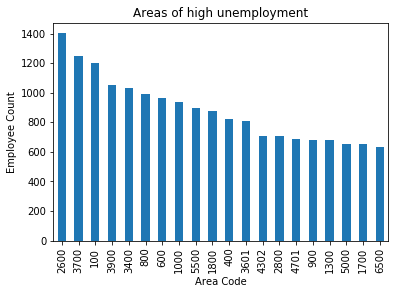

In [119]:
data=df11.groupby('PUMA')['ID'].count().sort_values(ascending=False).head(20)
data.plot(kind="bar",title='Areas of high unemployment')
plt.xlabel('Area Code')
plt.ylabel('Employee Count')

In [ ]:
### 3.5 Wages as per Education Qualification

Text(0, 0.5, 'Wage')

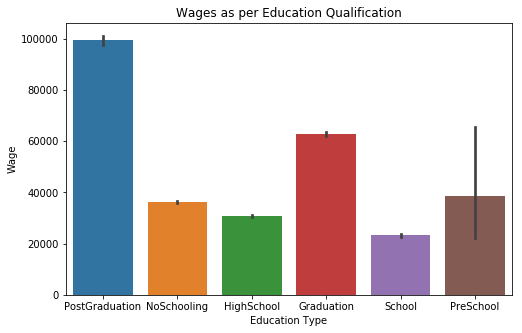

In [117]:
plt.figure(figsize=(8,5))
plt.title('Wages as per Education Qualification')
sns.barplot(df12.SCH_Cat,df1.WAGP)
plt.xlabel('Education Type')
plt.ylabel('Wage')

### 3.6 Employee Distribution by the type of industry

Text(0, 0.5, 'Employee Count')

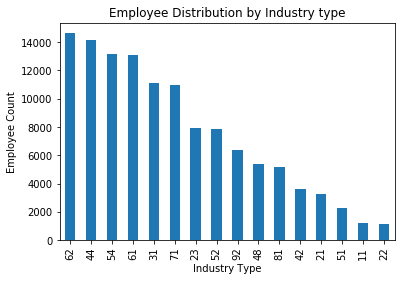

In [118]:
data=df12.groupby('NAICSP_Cat')['ID'].count().sort_values(ascending=False).head(20)
data.plot(kind="bar",title='Employee Distribution by Industry type')
plt.xlabel('Industry Type')
plt.ylabel('Employee Count')

### 3.7 Income distribution by industry, Highest paying industries

Text(0, 0.5, 'Wage')

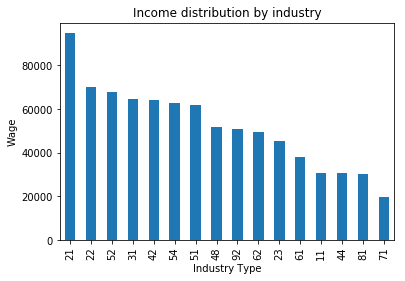

In [121]:
data=df12.groupby('NAICSP_Cat')['WAGP'].mean().sort_values(ascending=False).head(20)
data.plot(kind="bar",title='Income distribution by industry')
plt.xlabel('Industry Type')
plt.ylabel('Wage')

### 3.8 Which industry has the most hectic hours

Text(0, 0.5, 'Hours worked')

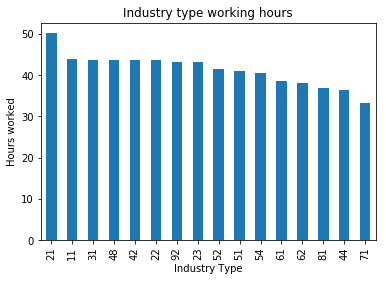

In [122]:
data=df12.groupby('NAICSP_Cat')['WKHP'].mean().sort_values(ascending=False).head(20)
data.plot(kind="bar",title='Industry type working hours')
plt.xlabel('Industry Type')
plt.ylabel('Hours worked')

## 4. Model Building

In [123]:
df2 = df1.copy()

In [124]:
df2.columns

Index(['ID', 'ST', 'PUMA', 'JWMNP', 'SCHL', 'WAGP', 'WKHP', 'WKW', 'ESR',
       'FOD1P', 'NAICSP', 'JWAP', 'JWDP', 'SOCP', 'POWPUMA', 'POWSP', 'NWAB',
       'NWAV', 'NWLA', 'NWLK', 'AGEP', 'SCH_Cat', 'FOD1P_Cat', 'NAICSP_Cat',
       'SOCP_Cat', 'POWPUMA_Cat'],
      dtype='object')

In [125]:
# Dropping redundant columns and columns with too many levels
df2.drop(['ST','POWSP','FOD1P','NAICSP','SOCP','POWPUMA','PUMA','JWDP','JWAP','SCHL','ID'],axis=1,inplace=True)
df2.columns

Index(['JWMNP', 'WAGP', 'WKHP', 'WKW', 'ESR', 'NWAB', 'NWAV', 'NWLA', 'NWLK',
       'AGEP', 'SCH_Cat', 'FOD1P_Cat', 'NAICSP_Cat', 'SOCP_Cat',
       'POWPUMA_Cat'],
      dtype='object')

In [126]:
df2.dtypes

JWMNP          float64
WAGP           float64
WKHP           float64
WKW            float64
ESR            float64
NWAB           float64
NWAV           float64
NWLA           float64
NWLK           float64
AGEP             int64
SCH_Cat         object
FOD1P_Cat       object
NAICSP_Cat      object
SOCP_Cat        object
POWPUMA_Cat     object
dtype: object

In [127]:
#Changing datatype of columns to categorical 

cols_cat = ['NWAB','ESR','NWAV','NWLA','NWLK']
for col in df2.columns:
    if col in cols_cat:
        df2[col] = df2[col].astype(object)
df2.dtypes

JWMNP          float64
WAGP           float64
WKHP           float64
WKW            float64
ESR             object
NWAB            object
NWAV            object
NWLA            object
NWLK            object
AGEP             int64
SCH_Cat         object
FOD1P_Cat       object
NAICSP_Cat      object
SOCP_Cat        object
POWPUMA_Cat     object
dtype: object

### Checking outliers

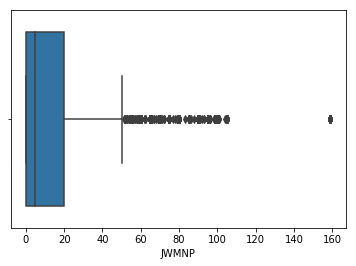

In [128]:
import seaborn as sns

sns.boxplot(df2['JWMNP'])

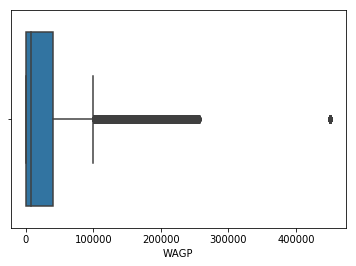

In [129]:
sns.boxplot(df2['WAGP'])

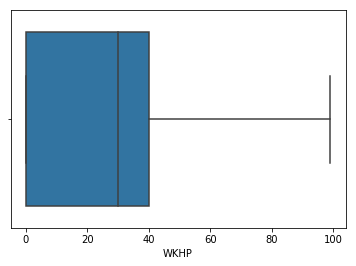

In [130]:
sns.boxplot(df2['WKHP'])

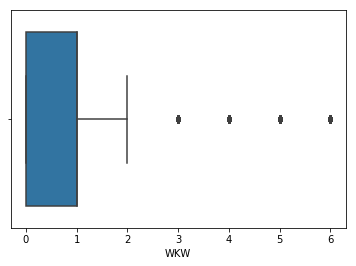

In [131]:
sns.boxplot(df2['WKW'])

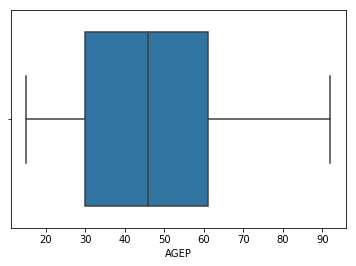

In [132]:
sns.boxplot(df2['AGEP'])

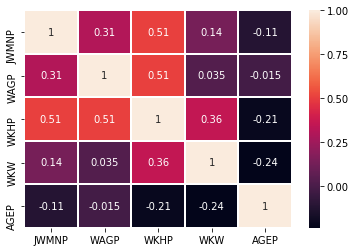

In [133]:
# Checking correlation between the columns

import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(df2.corr(),annot=True,linewidths=1)

### Removing outliers

In [134]:
df3 = df2.copy()

In [135]:
df3.describe()

,JWMNP,WAGP,WKHP,WKW,AGEP
count,208917.000000,208917.000000,208917.000000,208917.000000,208917.000000
mean,13.746847,28058.387857,24.672305,1.143746,46.564578
std,21.169373,52571.880706,21.894023,1.544477,19.252988
min,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,0.000000,0.000000,0.000000,30.000000
50%,5.000000,7200.000000,30.000000,1.000000,46.000000
75%,20.000000,40000.000000,40.000000,1.000000,61.000000
max,159.000000,451000.000000,99.000000,6.000000,92.000000


In [136]:
(df3['WAGP'] == 0).sum()

87588

In [137]:
(df3['WAGP'] == 451000).sum()

1589

In [138]:
df3.shape

(208917, 15)

In [139]:
df3 = df3[df3['WAGP'] != 0]
df3.shape

(121329, 15)

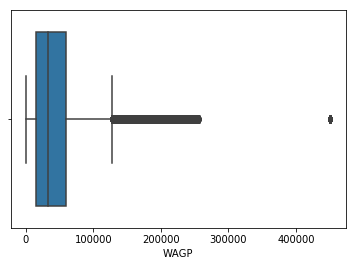

In [140]:
sns.boxplot(df3['WAGP'])

In [141]:
df3 = df3[df3['WAGP'] != 451000]
df3.shape

(119740, 15)

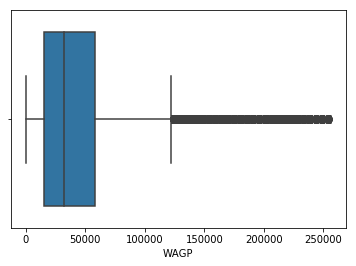

In [142]:
sns.boxplot(df3['WAGP'])

In [143]:
(df3['WAGP'] > 150000).sum()

3071

In [144]:
df3 = df3[df3['WAGP'] < 110000]
df3.shape

(111470, 15)

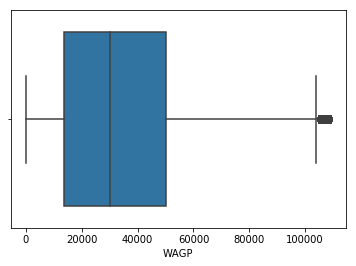

In [145]:
sns.boxplot(df3['WAGP'])

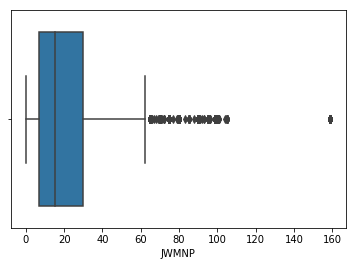

In [146]:
sns.boxplot(df3['JWMNP'])

In [147]:
(df3['JWMNP'] > 60).sum()

3246

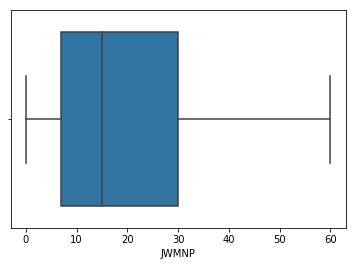

In [148]:
for index,row in df3.iterrows():
    if df3.loc[index,'JWMNP'] > 60:
        df3.loc[index,'JWMNP'] = 60
sns.boxplot(df3['JWMNP'])

In [149]:

df3.shape

(111470, 15)

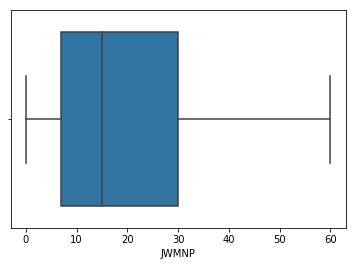

In [150]:
sns.boxplot(df3['JWMNP'])

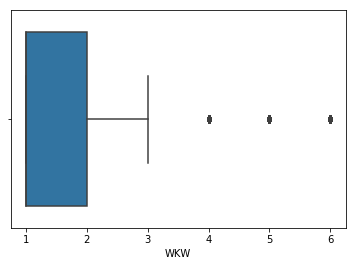

In [151]:
sns.boxplot(df3['WKW'])

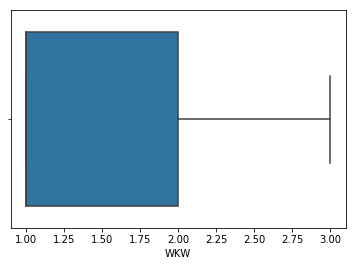

In [152]:
for index,row in df3.iterrows():
    if df3.loc[index,'WKW'] > 3:
        df3.loc[index,'WKW'] = 3
sns.boxplot(df3['WKW'])

In [153]:
df3.columns

Index(['JWMNP', 'WAGP', 'WKHP', 'WKW', 'ESR', 'NWAB', 'NWAV', 'NWLA', 'NWLK',
       'AGEP', 'SCH_Cat', 'FOD1P_Cat', 'NAICSP_Cat', 'SOCP_Cat',
       'POWPUMA_Cat'],
      dtype='object')

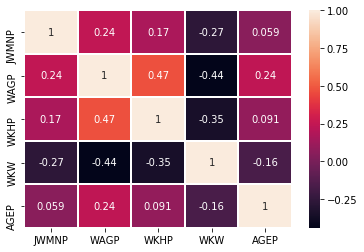

In [154]:
sns.heatmap(df3.corr(),annot=True,linewidths=1)

In [155]:
X = df3.loc[:,~df3.columns.isin(['WAGP'])]
y = df3['WAGP']

In [156]:
print(X.shape)
print(y.shape)

(111470, 14)
(111470,)


In [157]:
# One Hot Encoding
X_dummy = pd.get_dummies(X,drop_first=True,prefix_sep='_')
X_dummy.shape

(111470, 64)

In [158]:
# Building a Linear Regression Model

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_dummy,y,test_size=0.3,random_state=70)
linear_model = LinearRegression().fit(X_train,y_train)

y_train_predict = linear_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred_linear = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 18308.33092234188
R2 score on Training Set:  0.5128867354805232
Root mean squared error on Testing Set 18460.205326720825
R2 score on Testing Set:  0.5114360415010928


In [ ]:
# Building a Decision Tree Regressor

#ID3 are able to handle categorical variables. Other, like CART algorithm are not.

In [191]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=10,max_features='sqrt',max_leaf_nodes=50)

In [192]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=50,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [193]:
y_train_predict = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 18530.607677289245
R2 score on Training Set:  0.5009871014429841
Root mean squared error on Testing Set 18897.108885982347
R2 score on Testing Set:  0.4880363786866857


In [232]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
print(rf.get_params())

{'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'max_leaf_nodes': None, 'min_samples_split': 2, 'criterion': 'mse', 'min_samples_leaf': 1, 'max_features': 'auto', 'n_jobs': None, 'max_depth': None, 'n_estimators': 'warn', 'warm_start': False, 'min_impurity_split': None, 'bootstrap': True, 'verbose': 0, 'random_state': 0, 'oob_score': False}


In [233]:
rf.fit(X_train,y_train)

y_train_predict = rf.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root mean squared error on Training Set 8465.792426194916
R2 score on Training Set:  0.8958479841495919
Root mean squared error on Testing Set 19013.11957513595
R2 score on Testing Set:  0.4817311218793705


In [ ]:
### Random Hyperparameter Grid

In [237]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [50, 100, 150,200]

# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30,50]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'max_depth': [10, 22, 35, 47, 60], 'min_samples_split': [50, 100, 150, 200], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'bootstrap': [True, False], 'min_samples_leaf': [20, 30, 50], 'max_features': ['auto', 'sqrt']}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

'''
The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, 
and cv which is the number of folds to use for cross validation (we use 100 and 5 respectively). 
More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, 
but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is 
one of the most fundamental. '''
import datetime

print("Start of Randomized Search CV ",datetime.datetime.now())
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,random_state=0,n_jobs=-1,cv=5)

# Fit the random search model
rf_random.fit(X_train, y_train)
print("End of Randomized Search CV ",datetime.datetime.now())

Start of Randomized Search CV  2019-04-20 12:43:47.814352


In [162]:
a = y_train_predict-y_train
a = abs(a)

In [163]:
a.shape

(78029,)

In [164]:
a

87296     19557.301392
254468    59811.561016
67093     14632.881824
49600     62355.460479
229323     9510.067599
239898      879.821925
594       22776.279513
35063     16605.623298
205830    27319.230750
244515    28605.255268
87603      7389.964000
197466    22013.363988
60118     34371.760228
84289      5534.408905
44707      2888.828931
39679     13155.806187
135403    18047.654139
219151    27946.494380
174691      427.267447
56489     10283.340841
103321    36342.193419
56810     10305.093290
251077     8577.084116
96501      8576.960081
67893     46282.855432
104766     9829.955561
140698    37955.216618
125506    51552.676613
219560    14217.753218
216687    18012.028252
              ...     
145998     5260.927562
108376     9473.258337
8442      39299.400081
201654     6995.391437
259067    13507.481882
3842       9580.920986
187835     7165.891615
34396     13924.938309
194598    39737.303596
133644     5098.140510
44495     11356.647473
196680    29556.112173
165260    2

In [165]:
b = y_test - y_pred_linear
b = abs(b)

In [166]:
b.shape

(33441,)

In [167]:
a_df = pd.DataFrame(data = a)
a_df.head()

,WAGP
87296,19557.301392
254468,59811.561016
67093,14632.881824
49600,62355.460479
229323,9510.067599


In [168]:
a_df.columns = ['Err']
a_df.head()

,Err
87296,19557.301392
254468,59811.561016
67093,14632.881824
49600,62355.460479
229323,9510.067599


In [169]:
b_df = pd.DataFrame(data = b)
b_df.columns = ['Err']
b_df.head()

,Err
112973,19667.041176
151041,14739.818336
101825,5707.977033
179989,15853.891486
177062,27598.518915


In [170]:
error_df = pd.concat([a_df,b_df])

In [171]:
error_df.shape

(111470, 1)

In [172]:
df6['Error'] = error_df

NameError: name 'df6' is not defined

In [ ]:
df6.columns

In [ ]:
df6.shape

In [ ]:
df6_sorted = df6.sort_values(by='Error',ascending=False)

In [ ]:
df6_sorted.head()

In [ ]:
df6_sorted.to_csv('df6_err.csv',index=False)

In [ ]:
df6_sorted.iloc[59317,:]

In [ ]:
df6_sorted.head()

In [ ]:
df7 = df6_sorted.copy()

In [ ]:
idx = pd.Series(np.arange(0,len(df7)))
df7.set_index(idx)

In [ ]:
### Model 1 - Error 50k and above

In [ ]:
#df8 = df7.iloc[0:59318,:]
df8 = df7.iloc[0:1765,:]

In [ ]:
df8.shape

In [ ]:
df8.head()

In [ ]:
df9 = df8.copy() #backup of err dataframe final

In [ ]:
df9.drop(['Error'],axis=1,inplace=True)

In [ ]:
df9.corr()

In [ ]:
sns.boxplot(df9['WAGP'])

In [ ]:
df9 = df9[df9['WAGP'] > 60000]
df9.shape

In [ ]:
sns.boxplot(df9['WAGP'])

In [ ]:
sns.boxplot(df9['WKHP'])

In [ ]:
df9 = df9[(df9['WKHP'] > 30) & (df9['WKHP'] < 60)]
df9.shape

In [ ]:
X1 = df9.loc[:,~df9.columns.isin(['WAGP'])]
y1 = df9['WAGP']
X_dummy1 = pd.get_dummies(X1,drop_first=True,prefix_sep='_')
X_dummy1.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_dummy1,y1,test_size=0.3,random_state=70)
linear_model = LinearRegression().fit(X_train,y_train)

y_train_predict = linear_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred_linear = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

## MOdel 2 - 30k- 50k

In [ ]:
#df8 = df7.iloc[1765:11620,:]
df8 = df7.iloc[1765:111471,:]
df8.shape
df9 = df8.copy()

In [ ]:
df9.drop(['Error'],axis=1,inplace=True)

In [ ]:
df9.corr()

In [ ]:
sns.boxplot(df9['WAGP'])

In [ ]:
sns.boxplot(df9['WKHP'])

In [ ]:
df9 = df9[(df9['WKHP'] > 30) & (df9['WKHP'] < 60)]
df9.shape

In [ ]:
X1 = df9.loc[:,~df9.columns.isin(['WAGP'])]
y1 = df9['WAGP']
X_dummy1 = pd.get_dummies(X1,drop_first=True,prefix_sep='_')
X_dummy1.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_dummy1,y1,test_size=0.3,random_state=70)
linear_model = LinearRegression().fit(X_train,y_train)

y_train_predict = linear_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred_linear = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

In [ ]:
df7.to_csv('df7.csv',index=False)
df7.iloc[0:10,:]

In [ ]:
## Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1,random_state=0,max_iter=2000)
lasso_reg.fit(X_train,y_train)
y_pred_lasso = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
r2 = r2_score(y_test,y_pred_lasso)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

In [ ]:
## Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=0)
ridge_reg.fit(X_train,y_train)
y_pred_ridge = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

### Trying Polynomial features

In [ ]:
sns.scatterplot(df3['WAGP'],df3['JWMNP'])

In [ ]:
sns.scatterplot(df3['WAGP'],df3['AGEP'])

In [ ]:
sns.scatterplot(df3['WAGP'],df3['WKHP'])

In [ ]:
df4 = df3.copy()

In [ ]:
df9['WKHP_2'] = df9['WKHP'] * df9['WKHP']  
df9['WKW_2'] = df9['WKW'] * df9['WKW']
df9['AGEP_2'] = df9['AGEP'] * df9['AGEP']
df9['JWMNP_2'] = df9['JWMNP'] * df9['JWMNP']
df9.shape

In [ ]:
df9['WKHP_3'] = df9['WKHP'] * df9['WKHP']  * df9['WKHP']  
df9['WKW_3'] = df9['WKW'] * df9['WKW'] * df9['WKW']
df9['AGEP_3'] = df9['AGEP'] * df9['AGEP'] * df9['AGEP']
df9['JWMNP_3'] = df9['JWMNP'] * df9['JWMNP'] * df9['JWMNP']
df9.shape

In [ ]:
df4['WKHP_4'] = df4['WKHP'] * df4['WKHP']  * df4['WKHP']  * df4['WKHP']  
df4['WKW_4'] = df4['WKW'] * df4['WKW'] * df4['WKW'] * df4['WKW']
df4['AGEP_4'] = df4['AGEP'] * df4['AGEP'] * df4['AGEP'] * df4['AGEP']
df4['JWMNP_4'] = df4['JWMNP'] * df4['JWMNP'] * df4['JWMNP'] * df4['JWMNP']
df4.shape

In [ ]:
df4.columns

In [ ]:
df4.ESR.value_counts()

In [ ]:
# Combining 1 and 2, 4 and 5 as they belong to Civilian and Armed forces category
replace_esr = {2:1,5:4}
df4['ESR'] = df4['ESR'].replace(replace_esr)

In [ ]:
#df4.drop(['NWAB'],axis=1,inplace=True)
#df4.drop(['NWAB','NWAV','NWLA','NWLK'],axis=1,inplace=True)
df4.shape

In [ ]:
df4.NAICSP_Cat.value_counts()

In [ ]:
df4.SOCP_Cat.value_counts()

In [ ]:

Xp = df9.loc[:,~df9.columns.isin(['WAGP'])]
yp = df9['WAGP']
X_dummy_p = pd.get_dummies(Xp,drop_first=True,prefix_sep='_')
X_dummy_p.shape

X_train1,X_test1,y_train1,y_test1= train_test_split(X_dummy_p,yp,test_size=0.3,random_state=70)
linear_model = LinearRegression().fit(X_train1,y_train1)

y_train_predict = linear_model.predict(X_train1)
rmse_train = np.sqrt(mean_squared_error(y_train1,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred_linear = linear_model.predict(X_test1)
rmse = np.sqrt(mean_squared_error(y_test1,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

In [ ]:
sns.boxplot(df9['JWMNP'])

In [ ]:
sns.boxplot(df9['WKHP'])

In [ ]:
sns.boxplot(df9['WKW'])